<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Training**

## **Import**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

## **Load the Dataset**

In [24]:
df = pd.read_csv("standardized_data.csv")

## **Understanding Data**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765 entries, 0 to 4764
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4765 non-null   float64
 1   homepage      4765 non-null   int64  
 2   popularity    4765 non-null   float64
 3   revenue       4765 non-null   float64
 4   runtime       4765 non-null   float64
 5   vote_average  4765 non-null   float64
 6   vote_count    4765 non-null   float64
 7   Age_of_Movie  4765 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 297.9 KB


In [26]:
df.head()

,budget,homepage,popularity,revenue,runtime,vote_average,vote_count,Age_of_Movie
0,0.886824,1,2.165203,1.162269,2.655736,0.949993,9.375940,17.0
1,0.920587,1,2.097304,1.031082,2.997545,0.687747,8.412055,19.0
2,0.891579,1,1.873750,1.020331,1.972119,0.163255,8.404472,11.0
3,0.894472,1,1.912551,1.046023,2.802226,1.299654,9.116799,14.0
4,0.900090,1,1.106634,0.880998,1.190842,-0.011576,7.661527,14.0


## **Perform PCA**

In [27]:
pca = PCA(n_components=2)
df = pca.fit_transform(df)

In [28]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedVariance = explained_variance[0]
print("Explained variance of PC1 = ", PC1_explainedVariance)

PC2_explainedVariance = explained_variance[1]
print("Explained variance of PC2 = ", PC2_explainedVariance)

Explained variance of PC1 =  0.9472675226282
Explained variance of PC2 =  0.0351662503710223


In [29]:
print("Total explained variance: ", explained_variance.sum())

Total explained variance:  0.9824337729992223


Text(0, 0.5, 'Exaplained Variance')

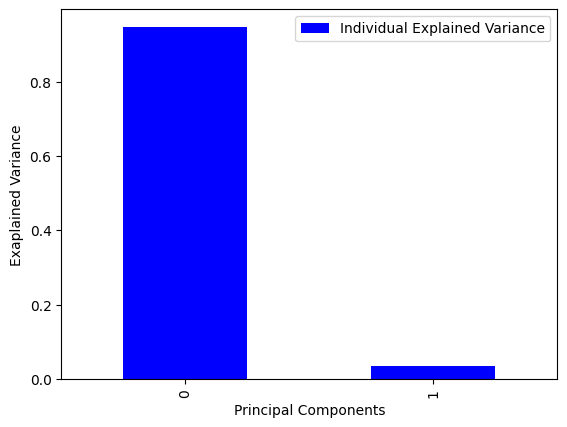

In [30]:
pd.DataFrame(explained_variance).plot.bar(color = 'blue')
plt.legend(['Individual Explained Variance'])
plt.xlabel("Principal Components")
plt.ylabel("Exaplained Variance")

## **Visualize the Data**

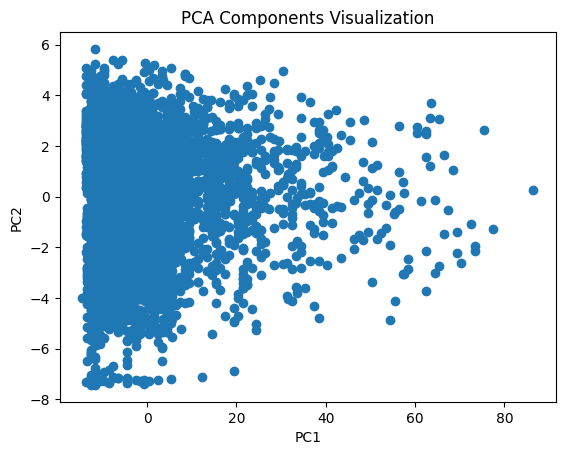

In [31]:
plt.scatter(df[:, 0], df[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Components Visualization')
plt.show()

## **Model Training**

### **K-Means**

For cluster = 1, SSE/WCSS is 764475.685121175
For cluster = 2, SSE/WCSS is 304703.180900248
For cluster = 3, SSE/WCSS is 173734.68965440593
For cluster = 4, SSE/WCSS is 106390.94713273934
For cluster = 5, SSE/WCSS is 82336.44379699446
For cluster = 6, SSE/WCSS is 62692.11184524844
For cluster = 7, SSE/WCSS is 53295.10263578272
For cluster = 8, SSE/WCSS is 45477.40062529448
For cluster = 9, SSE/WCSS is 40408.812382936965
For cluster = 10, SSE/WCSS is 36171.32703670135


Text(0, 0.5, 'WCSS')

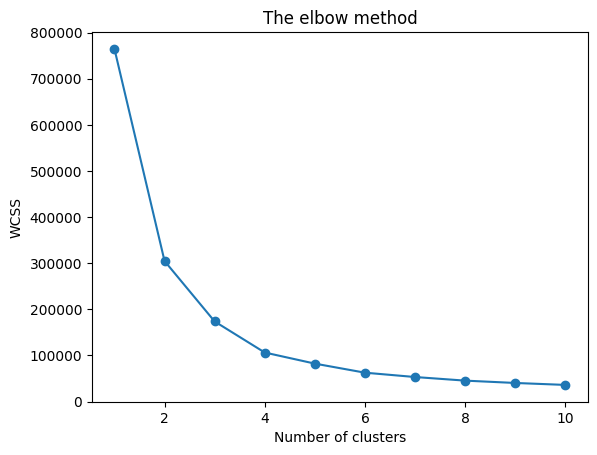

In [32]:
wcss=[]
sse={}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df) # Changed new_df to df
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [33]:
cluster_Kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
model_kmeans = cluster_Kmeans.fit(df)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
print(dict(zip(unique, counts)))

# Create a DataFrame from the PCA-transformed data (df is a numpy array) and add the cluster labels
df_with_clusters = pd.DataFrame(data=df, columns=['PC1', 'PC2'])
df_with_clusters['cluster'] = pred_kmeans
df_with_clusters.head(10)

[0 3 0 ... 0 0 3]
{np.int32(0): np.int64(1422), np.int32(1): np.int64(1156), np.int32(2): np.int64(385), np.int32(3): np.int64(1689), np.int32(4): np.int64(113)}


,PC1,PC2,cluster
0,-6.604876,5.234532,0
1,-4.593940,4.445385,3
2,-12.611193,4.024988,0
3,-9.591799,4.983521,0
4,-9.611947,2.974497,0
5,-4.623547,3.786136,3
6,-7.620843,3.406686,0
7,-12.607776,4.582459,0
8,-6.596419,4.411252,3
9,-13.624806,4.396512,0


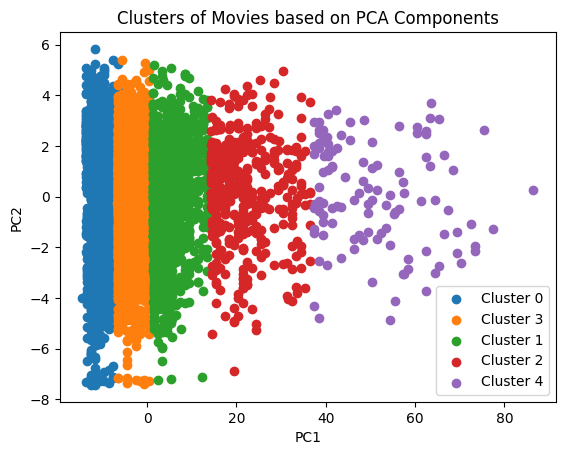

In [34]:
unique_clusters = df_with_clusters['cluster'].unique()

for cluster_label in unique_clusters:
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Movies based on PCA Components')
plt.legend()
plt.show()

### **Hierarchical**

Text(0, 0.5, 'Euclidean distance in the space with other variables')

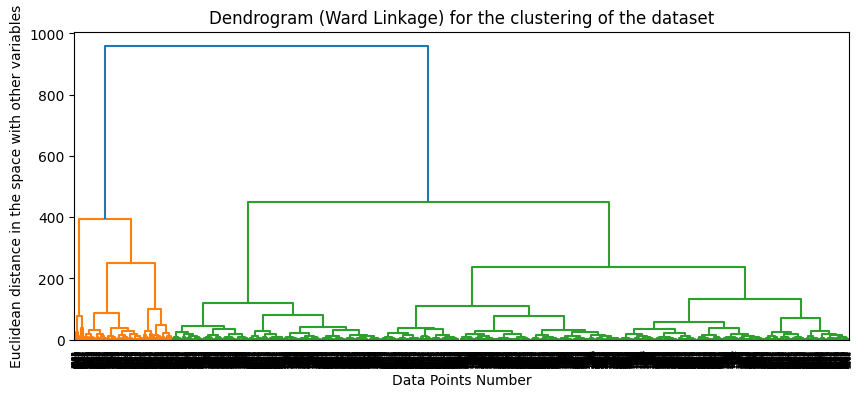

In [35]:
Z = sch.linkage(df, method = 'ward')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Ward Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [36]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage= 'ward')

model_clt = cluster_H.fit(df) # Changed three_df to df
print(model_clt)
print('\n')

# Create a DataFrame to add cluster labels
df_hierarchical_clusters = pd.DataFrame(data=df, columns=['PC1', 'PC2'])
df_hierarchical_clusters['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(df_hierarchical_clusters['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 3 :
0       1
1       1
2       1
3       1
4       1
       ..
4760    2
4761    1
4762    1
4763    1
4764    1
Name: clusters, Length: 4765, dtype: int64


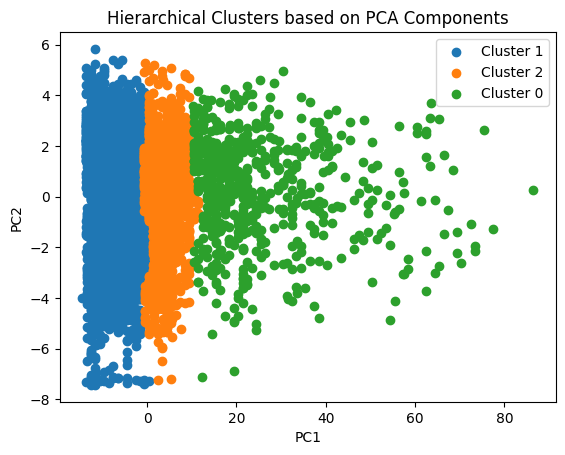

In [37]:
unique_clusters = df_hierarchical_clusters['clusters'].unique()

for cluster_label in unique_clusters:
    cluster_data = df_hierarchical_clusters[df_hierarchical_clusters['clusters'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clusters based on PCA Components')
plt.legend()
plt.show()

### **GMM**

In [38]:
gmm = GaussianMixture(
    n_components = 3,
    covariance_type = "full",
    random_state = 42
)
gmm.fit(df)
labels_gmm = gmm.predict(df)

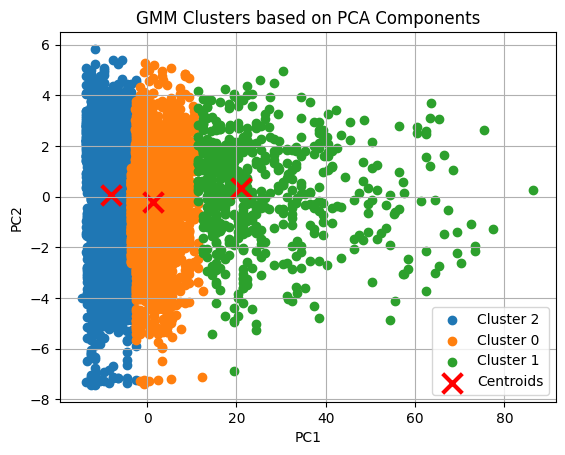

In [39]:
# Create a DataFrame to add cluster labels
df_gmm_clusters = pd.DataFrame(data=df, columns=['PC1', 'PC2'])
df_gmm_clusters['clusters'] = labels_gmm

# Visualize clusters
unique_clusters = df_gmm_clusters['clusters'].unique()

for cluster_label in unique_clusters:
    cluster_data = df_gmm_clusters[df_gmm_clusters['clusters'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

# Plot cluster centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c="red",
    marker='x',
    s=200,
    linewidths=3,
    label='Centroids'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clusters based on PCA Components')
plt.legend()
plt.grid(True)
plt.show()

## **Model Evaluation**

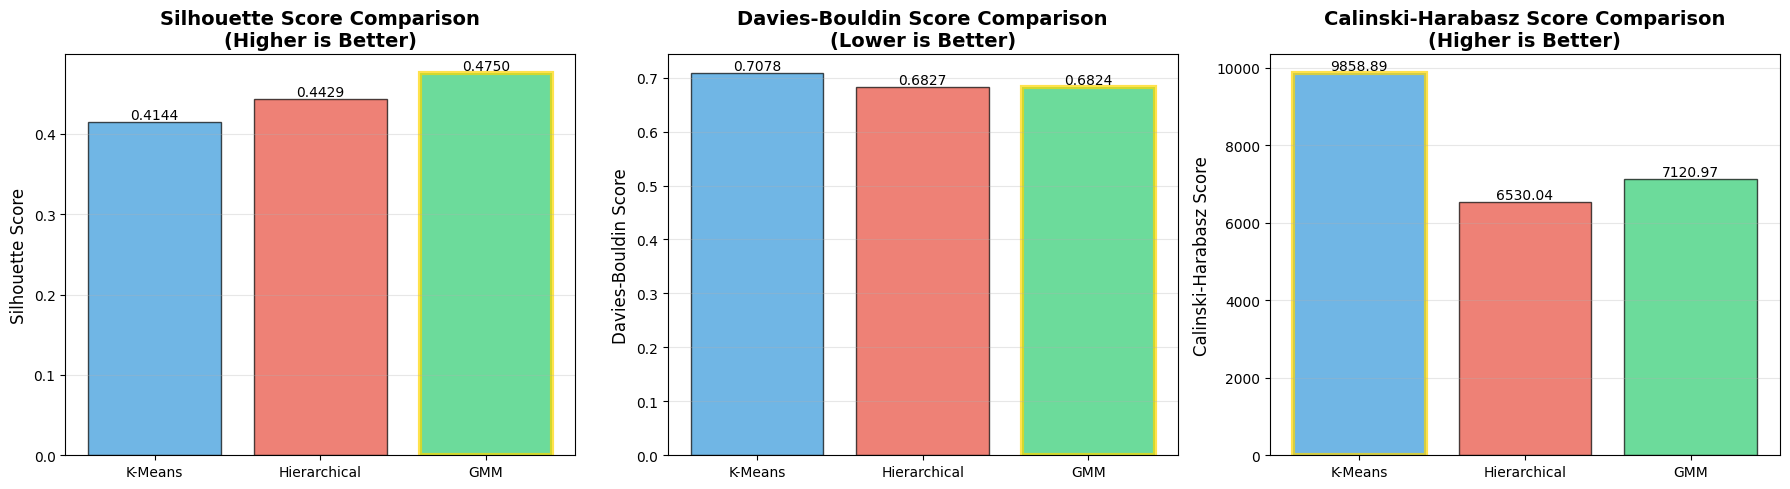

In [40]:
silhouette_kmeans = metrics.silhouette_score(df, pred_kmeans)
davies_bouldin_kmeans = metrics.davies_bouldin_score(df, pred_kmeans)
calinski_harabasz_kmeans = metrics.calinski_harabasz_score(df, pred_kmeans)

silhouette_hierarchical = metrics.silhouette_score(df, model_clt.labels_)
davies_bouldin_hierarchical = metrics.davies_bouldin_score(df, model_clt.labels_)
calinski_harabasz_hierarchical = metrics.calinski_harabasz_score(df, model_clt.labels_)

silhouette_gmm = metrics.silhouette_score(df, labels_gmm)
davies_bouldin_gmm = metrics.davies_bouldin_score(df, labels_gmm)
calinski_harabasz_gmm = metrics.calinski_harabasz_score(df, labels_gmm)

comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical, silhouette_gmm],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_hierarchical, davies_bouldin_gmm],
    'Calinski-Harabasz Score': [calinski_harabasz_kmeans, calinski_harabasz_hierarchical, calinski_harabasz_gmm]
})

# Visualize model comparison with bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = comparison_df['Model']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Plot 1: Silhouette Score (higher is better)
silhouette_scores = comparison_df['Silhouette Score']
bars1 = axes[0].bar(models, silhouette_scores, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

# Highlight best performer
best_silhouette_idx = silhouette_scores.idxmax()
bars1[best_silhouette_idx].set_edgecolor('gold')
bars1[best_silhouette_idx].set_linewidth(3)

# Plot 2: Davies-Bouldin Score (lower is better)
davies_scores = comparison_df['Davies-Bouldin Score']
bars2 = axes[1].bar(models, davies_scores, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[1].set_title('Davies-Bouldin Score Comparison\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

# Highlight best performer
best_davies_idx = davies_scores.idxmin()
bars2[best_davies_idx].set_edgecolor('gold')
bars2[best_davies_idx].set_linewidth(3)

# Plot 3: Calinski-Harabasz Score (higher is better)
calinski_scores = comparison_df['Calinski-Harabasz Score']
bars3 = axes[2].bar(models, calinski_scores, color=colors, alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[2].set_title('Calinski-Harabasz Score Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)

# Highlight best performer
best_calinski_idx = calinski_scores.idxmax()
bars3[best_calinski_idx].set_edgecolor('gold')
bars3[best_calinski_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

## **Interpretation of Results**

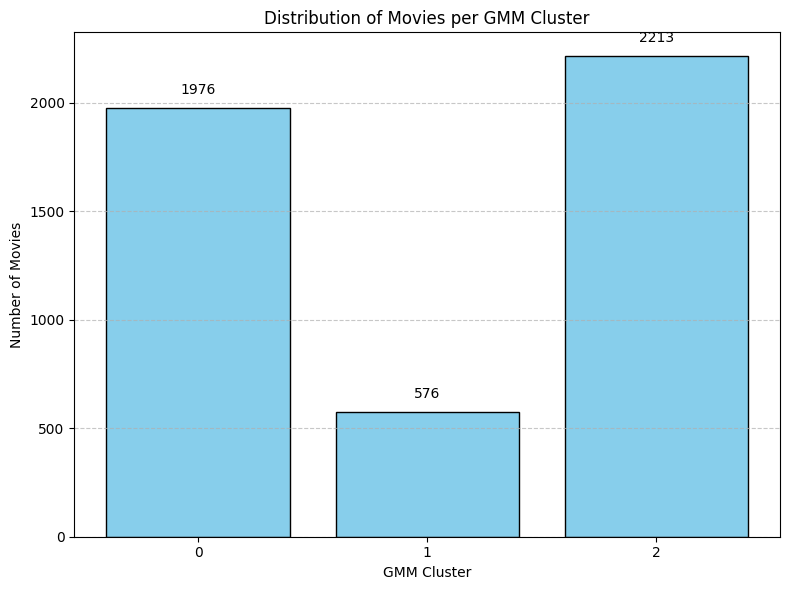

In [41]:
cluster_counts = df_gmm_clusters['clusters'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('GMM Cluster')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies per GMM Cluster')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(cluster_counts.values):
    plt.text(cluster_counts.index[i], count + 50, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Feature Distribution Across GMM Clusters**

In [42]:
# Load the original standardized data (before PCA transformation)
df_original = pd.read_csv("standardized_data.csv")

# Add GMM cluster labels to the original data
df_original['GMM_Cluster'] = labels_gmm

print("Original data with GMM clusters:")
print(df_original.head())
print(f"\nDataset shape: {df_original.shape}")
print(f"\nCluster distribution:\n{df_original['GMM_Cluster'].value_counts().sort_index()}")

Original data with GMM clusters:
     budget  homepage  popularity   revenue   runtime  vote_average  \
0  0.886824         1    2.165203  1.162269  2.655736      0.949993   
1  0.920587         1    2.097304  1.031082  2.997545      0.687747   
2  0.891579         1    1.873750  1.020331  1.972119      0.163255   
3  0.894472         1    1.912551  1.046023  2.802226      1.299654   
4  0.900090         1    1.106634  0.880998  1.190842     -0.011576   

   vote_count  Age_of_Movie  GMM_Cluster  
0    9.375940          17.0            2  
1    8.412055          19.0            2  
2    8.404472          11.0            2  
3    9.116799          14.0            2  
4    7.661527          14.0            2  

Dataset shape: (4765, 9)

Cluster distribution:
GMM_Cluster
0    1976
1     576
2    2213
Name: count, dtype: int64


In [43]:
def plot_feature_distribution_by_cluster(df, feature_name):
    """
    Create a bar plot showing the mean value of a feature for each GMM cluster.
    
    Parameters:
    - df: DataFrame with features and 'GMM_Cluster' column
    - feature_name: Name of the feature to visualize
    """
    
    plt.figure(figsize=(10, 6))
    
    # Define colors for each cluster
    cluster_colors = ['#3498db', '#e74c3c', '#2ecc71']
    n_clusters = df['GMM_Cluster'].nunique()
    
    # Calculate mean value for each cluster
    cluster_means = []
    cluster_labels = []
    
    for cluster in range(n_clusters):
        cluster_subset = df[df['GMM_Cluster'] == cluster]
        mean_value = cluster_subset[feature_name].mean()
        cluster_means.append(mean_value)
        cluster_labels.append(f'Cluster {cluster}')
    
    # Create bar chart
    bars = plt.bar(cluster_labels, cluster_means, color=cluster_colors, alpha=0.8, edgecolor='black', width=0.6)
    
    # Add value labels on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.xlabel('GMM Cluster', fontsize=12, fontweight='bold')
    plt.ylabel(f'Mean {feature_name}', fontsize=12, fontweight='bold')
    plt.title(f'Mean {feature_name} across GMM Clusters', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

print("Function 'plot_feature_distribution_by_cluster' defined successfully!")

Function 'plot_feature_distribution_by_cluster' defined successfully!


Visualizing 8 features across GMM clusters...

Creating plot for: budget


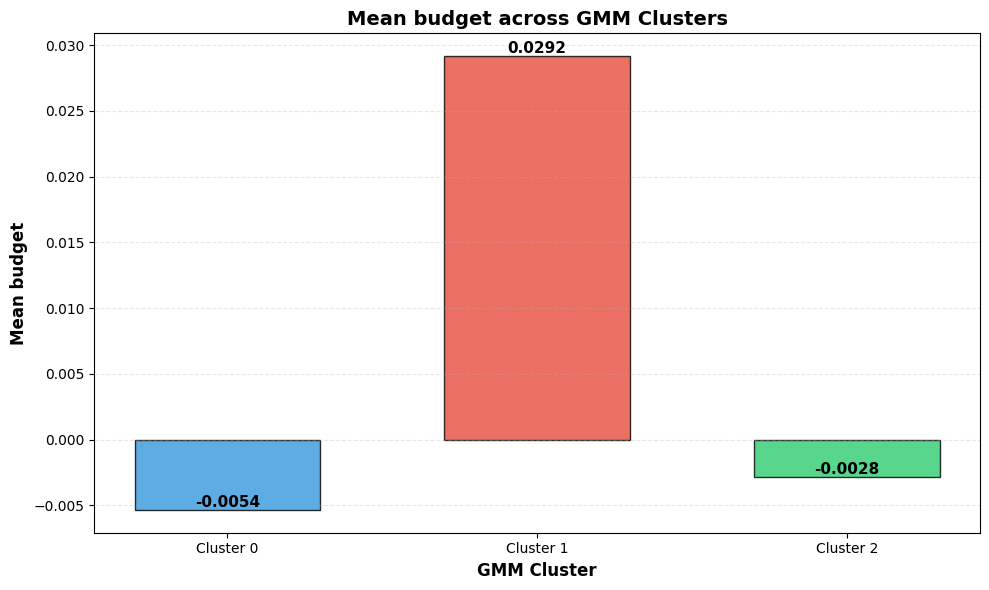

✓ Completed plot for budget

Creating plot for: homepage


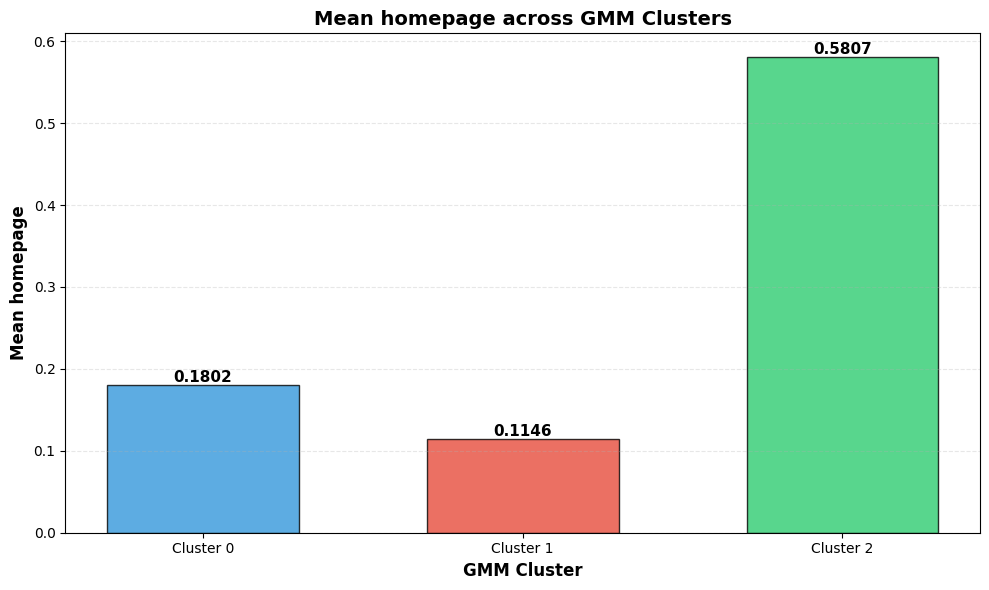

✓ Completed plot for homepage

Creating plot for: popularity


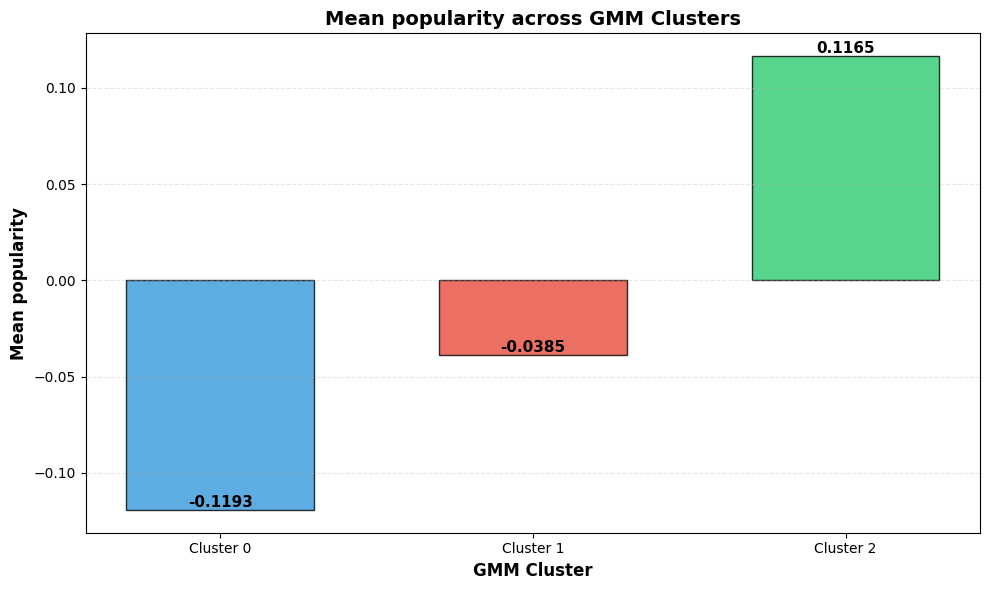

✓ Completed plot for popularity

Creating plot for: revenue


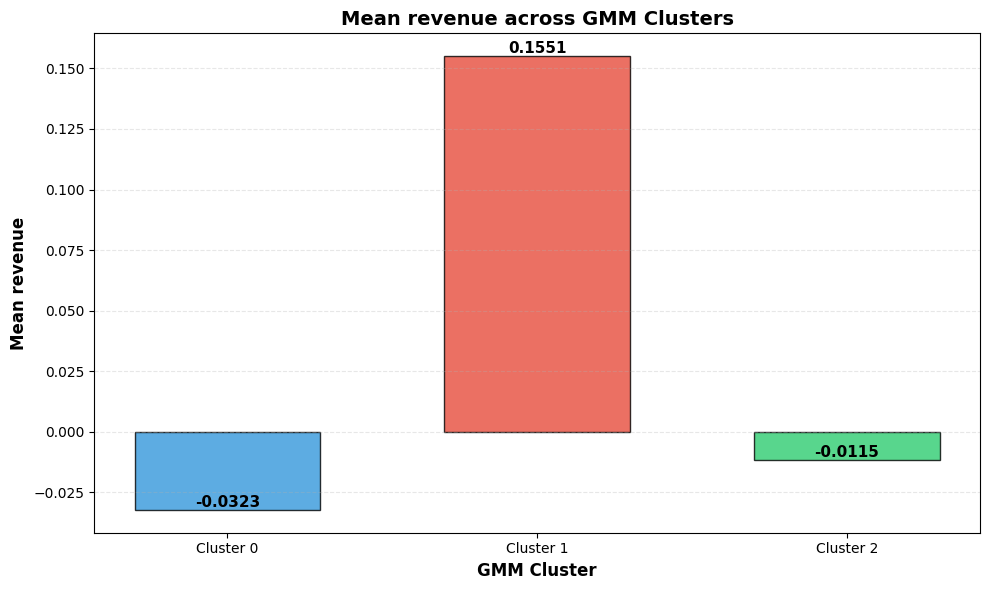

✓ Completed plot for revenue

Creating plot for: runtime


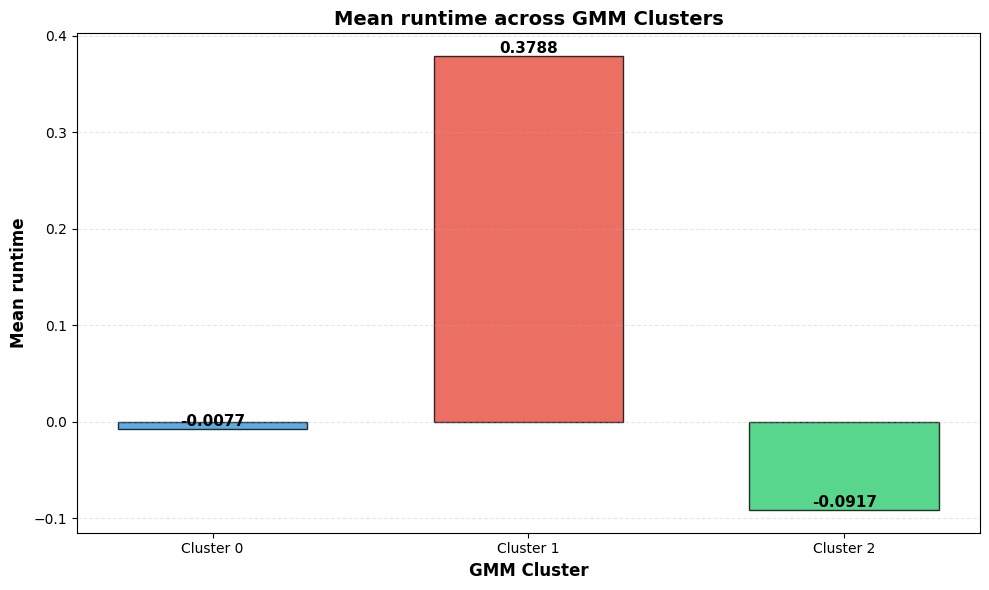

✓ Completed plot for runtime

Creating plot for: vote_average


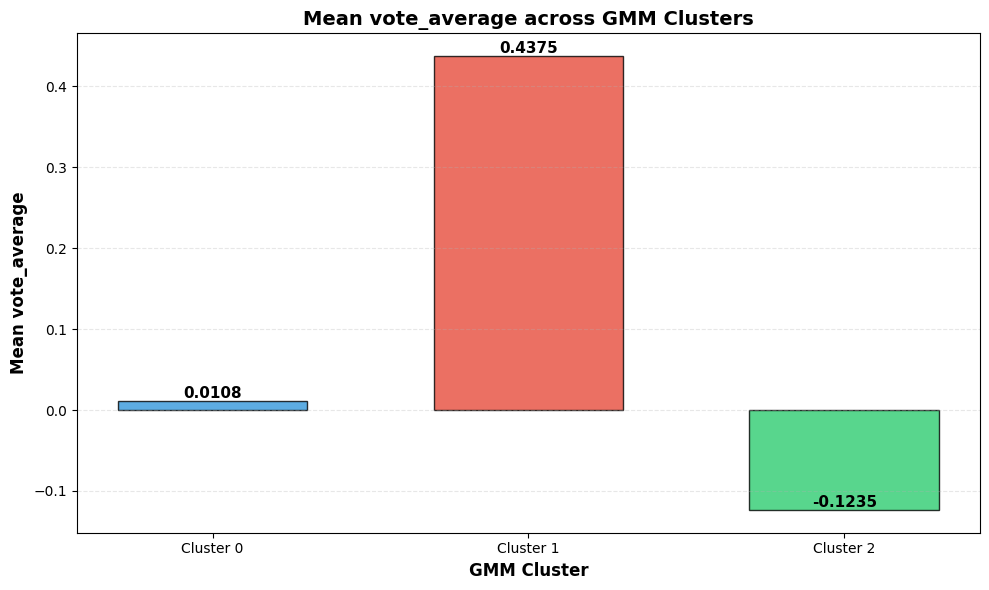

✓ Completed plot for vote_average

Creating plot for: vote_count


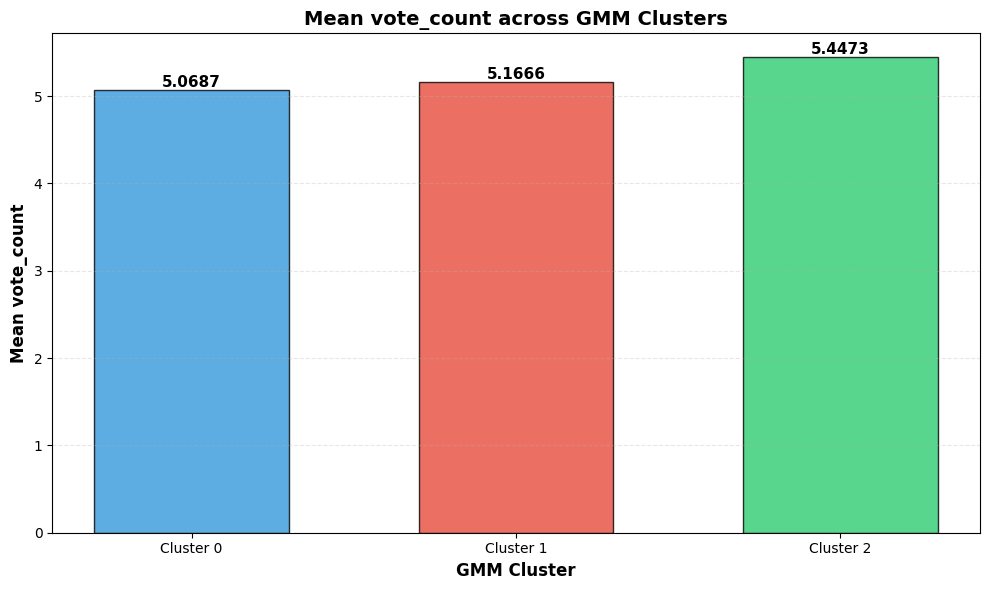

✓ Completed plot for vote_count

Creating plot for: Age_of_Movie


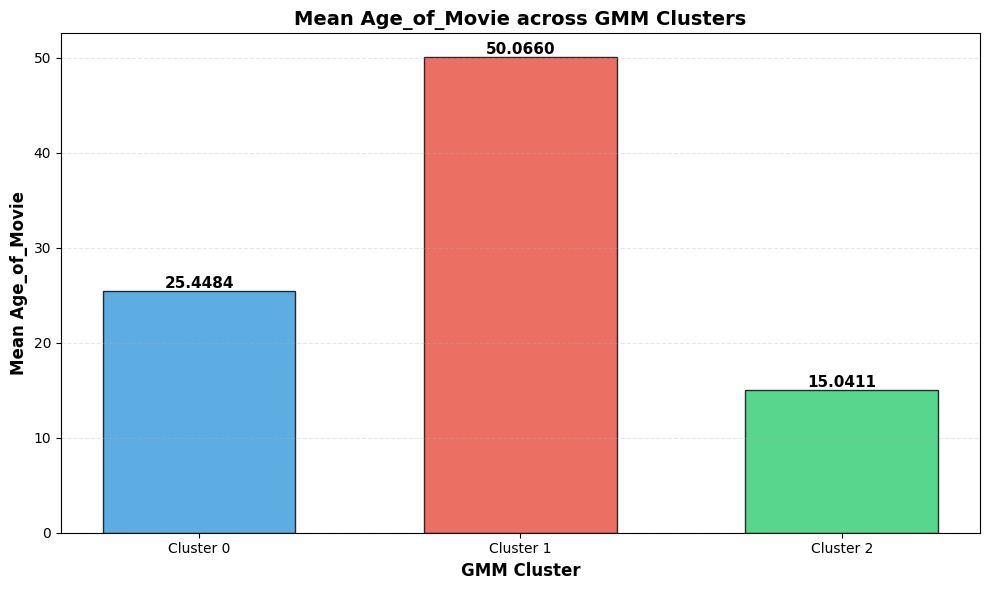

✓ Completed plot for Age_of_Movie



In [44]:
# Get all features (excluding the GMM_Cluster column)
features = [col for col in df_original.columns if col != 'GMM_Cluster']

print(f"Visualizing {len(features)} features across GMM clusters...\n")

# Visualize each feature
for feature in features:
    print(f"Creating plot for: {feature}")
    plot_feature_distribution_by_cluster(df_original.copy(), feature)
    print(f"✓ Completed plot for {feature}\n")

### **How to Interpret These Visualizations**

Each bar plot above shows:

1. **X-axis**: The three GMM clusters (Cluster 0, Cluster 1, Cluster 2)
2. **Y-axis**: Mean value of the feature for each cluster
3. **Colors**: Blue (Cluster 0), Red (Cluster 1), Green (Cluster 2)
4. **Values on bars**: Exact mean value for that cluster

**Key Insights to Look For:**
- **Cluster Differentiation**: Features with significantly different mean values across clusters are strong differentiators
- **Similar Patterns**: Features with similar mean values across all clusters may not be useful for distinguishing between clusters
- **Cluster Characteristics**: The mean values help you understand what defines each cluster

**Example Interpretations:**
- If Cluster 0 has the highest mean budget, it likely represents high-budget/blockbuster movies
- If Cluster 2 has the highest mean vote_average, it might represent critically acclaimed films
- If Cluster 1 has the lowest mean popularity, it could represent niche or lesser-known movies
- Features with nearly identical means across clusters don't strongly contribute to cluster separation